In [1]:
import sklearn as sk
import tensorflow as tf
from tensorflow import keras
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Generating a series
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1)*(freq1 * 10 + 10)) #first wave
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) #add another wave
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) #putting in some noise
    return series[..., np.newaxis].astype(np.float32)

In [3]:
#For plotting time series
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize = 10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth = 1)
    plt.axis([0, n_steps+1, -1, 1])

In [22]:
#For plotting learning curves
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training Loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label = "Validation Loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.1])
    plt.legend(fontsize = 14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

In [10]:
np.random.seed(69)
n_steps = 60
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000: ,-1]

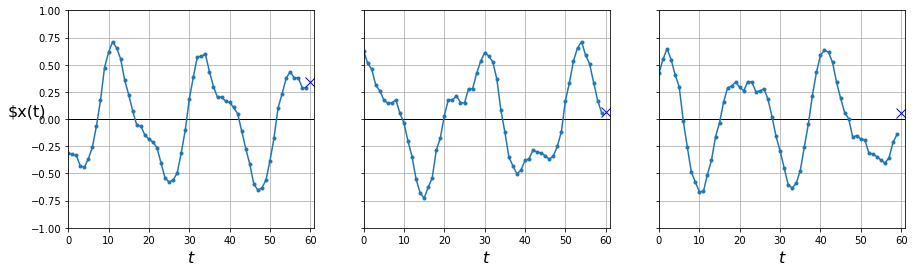

In [11]:
#let's just look at a few of these
fig, axes = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize=(15,4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0], y_label=("$x(t)" if col==0 else None))
plt.show()

In [27]:
#Make some linear predictions as a baseline

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[60, 1]),
    keras.layers.Dense(1)
])

model.compile(loss = "mse", optimizer = "adam")
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0830 - val_loss: 0.0410
Epoch 2/20
219/219 [==============================] - 0s 935us/step - loss: 0.0280 - val_loss: 0.0183
Epoch 3/20
219/219 [==============================] - 0s 935us/step - loss: 0.0141 - val_loss: 0.0112
Epoch 4/20
219/219 [==============================] - 0s 960us/step - loss: 0.0098 - val_loss: 0.0087
Epoch 5/20
219/219 [==============================] - 0s 946us/step - loss: 0.0081 - val_loss: 0.0074
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 0.0065
Epoch 7/20
219/219 [==============================] - 0s 890us/step - loss: 0.0063 - val_loss: 0.0058
Epoch 8/20
219/219 [==============================] - 0s 922us/step - loss: 0.0057 - val_loss: 0.0053
Epoch 9/20
219/219 [==============================] - 0s 935us/step - loss: 0.0052 - val_loss: 0.0050
Epoch 10/20
219/219 [==============================] - 0s 997us/step - loss: 0.0049 - 

In [28]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 633us/step - loss: 0.0035


0.0034632356837391853

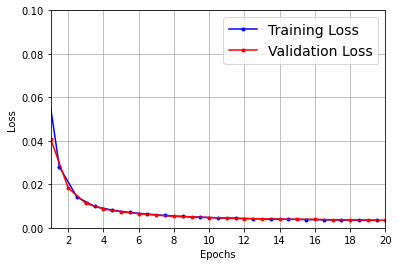

In [29]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

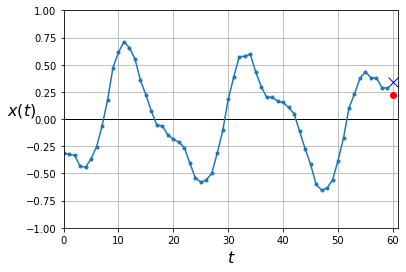

In [30]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :,0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [33]:
#Using a simple RNN
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

model.compile(loss = "mse", optimizer = keras.optimizers.Adam(lr=0.005))
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0296 - val_loss: 0.0101
Epoch 2/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 3/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0092 - val_loss: 0.0089
Epoch 4/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0091 - val_loss: 0.0090
Epoch 5/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 6/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 7/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 8/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 9/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 10/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0091 - val_loss: 0.0089

In [34]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0089


0.008857715874910355

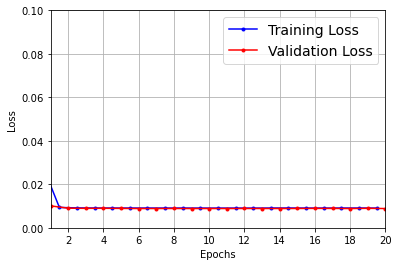

In [35]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

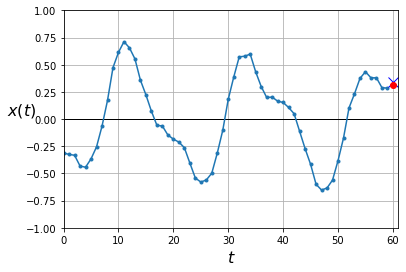

In [36]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :,0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [38]:
#Making a Deep RNN

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]),
    keras.layers.SimpleRNN(20, return_sequences = True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss = "mse", optimizer = "adam")
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0179 - val_loss: 0.0045
Epoch 2/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 3/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 4/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 5/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 6/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 7/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 8/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 9/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 10/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0027 - val_lo

In [39]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 6ms/step - loss: 0.0025


0.0025297102984040976

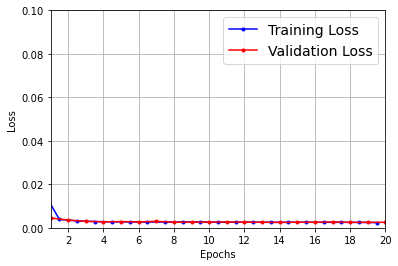

In [40]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

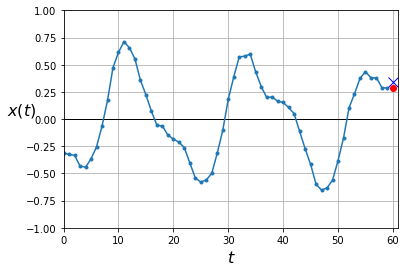

In [41]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :,0], y_valid[0, 0], y_pred[0, 0])
plt.show()

Now transition over to trying to forecast several steps ahead

In [47]:
#For plotting multiple timesteps ahead
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Prediction", markersize = 10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize = 14)

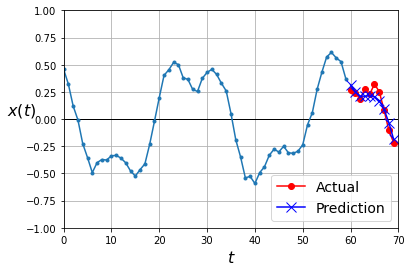

In [48]:
np.random.seed(42)
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis = 1) #concatenate predictions to what we already know
    
Y_pred = X[:, n_steps:]
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [69]:
#Previous was still using Deep RNN, now make one that forecasts ahead at every time step. Ie,
#the Deep RNN used timesteps 0-49 to predict 50-59, but now we want to predict 1-10 and timestep
#0, and 2-11 at timestep 1, etc.
np.random.seed(42)
tf.random.set_seed(42)

n_steps = 60
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

#Need a small function for getting loss at last time step
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0467 - last_time_step_mse: 0.0354 - val_loss: 0.0378 - val_last_time_step_mse: 0.0265
Epoch 2/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0367 - last_time_step_mse: 0.0263 - val_loss: 0.0338 - val_last_time_step_mse: 0.0245
Epoch 3/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0326 - last_time_step_mse: 0.0235 - val_loss: 0.0284 - val_last_time_step_mse: 0.0190
Epoch 4/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0291 - last_time_step_mse: 0.0199 - val_loss: 0.0302 - val_last_time_step_mse: 0.0232
Epoch 5/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0273 - last_time_step_mse: 0.0184 - val_loss: 0.0242 - val_last_time_step_mse: 0.0150
Epoch 6/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0249 - last_time_step_mse: 0.0154 - val_loss: 0.0247 - val_last_time_step_mse: 0.0154
Epoch 7/20
219/219 [==

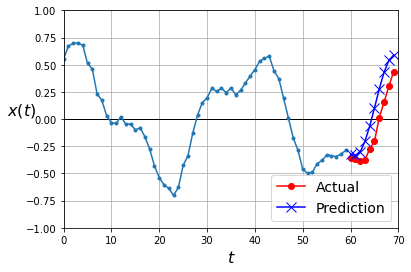

In [70]:
series = generate_time_series(1, 60 + 10)
X_new, Y_new = series[:, :60, :], series[:, 60:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [77]:
model.evaluate(X_valid, Y_valid)

63/63 [==============================] - 0s 5ms/step - loss: 0.0162 - last_time_step_mse: 0.0062


[0.016219818964600563, 0.0062285978347063065]